<a href="https://colab.research.google.com/github/metaute73/Proyecto-Gen-mica-2024-2/blob/main/Exploratory_analysis_LengthDepth_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [9]:
df = pd.read_csv('/content/LengthDepth_2.csv', delimiter="\t")


In [10]:
df.shape

(409, 5)

In [11]:
df.head(5)

,Scaffold,Length,GC,Depth,AltAllels
0,Contig_1_187.699,269.0,0.643123,187.699,0
1,Contig_2_308.549,15558.0,0.653040,308.549,0
2,Contig_3_361.647,77869.0,0.669111,361.647,0
3,Contig_4_338.273,125675.0,0.665892,338.273,0
4,Contig_5_381.157,67084.0,0.676391,381.157,0


In [12]:
df.dtypes

,0
Scaffold,object
Length,float64
GC,float64
Depth,float64
AltAllels,int64


In [13]:
df.describe()

,Length,GC,Depth,AltAllels
count,409.000000,409.000000,409.000000,409.000000
mean,17223.804401,0.624028,266.860285,0.325183
std,29983.616866,0.046395,237.176278,1.824231
min,237.000000,0.522954,38.133100,0.000000
25%,1262.000000,0.584908,117.114000,0.000000
50%,4267.000000,0.622798,265.811000,0.000000
75%,21405.000000,0.665892,347.326000,0.000000
max,259248.000000,0.758523,3638.530000,25.000000


In [14]:
df.isna().sum()

,0
Scaffold,0
Length,0
GC,0
Depth,0
AltAllels,0


In [16]:
df.loc[df.duplicated()]

,Scaffold,Length,GC,Depth,AltAllels


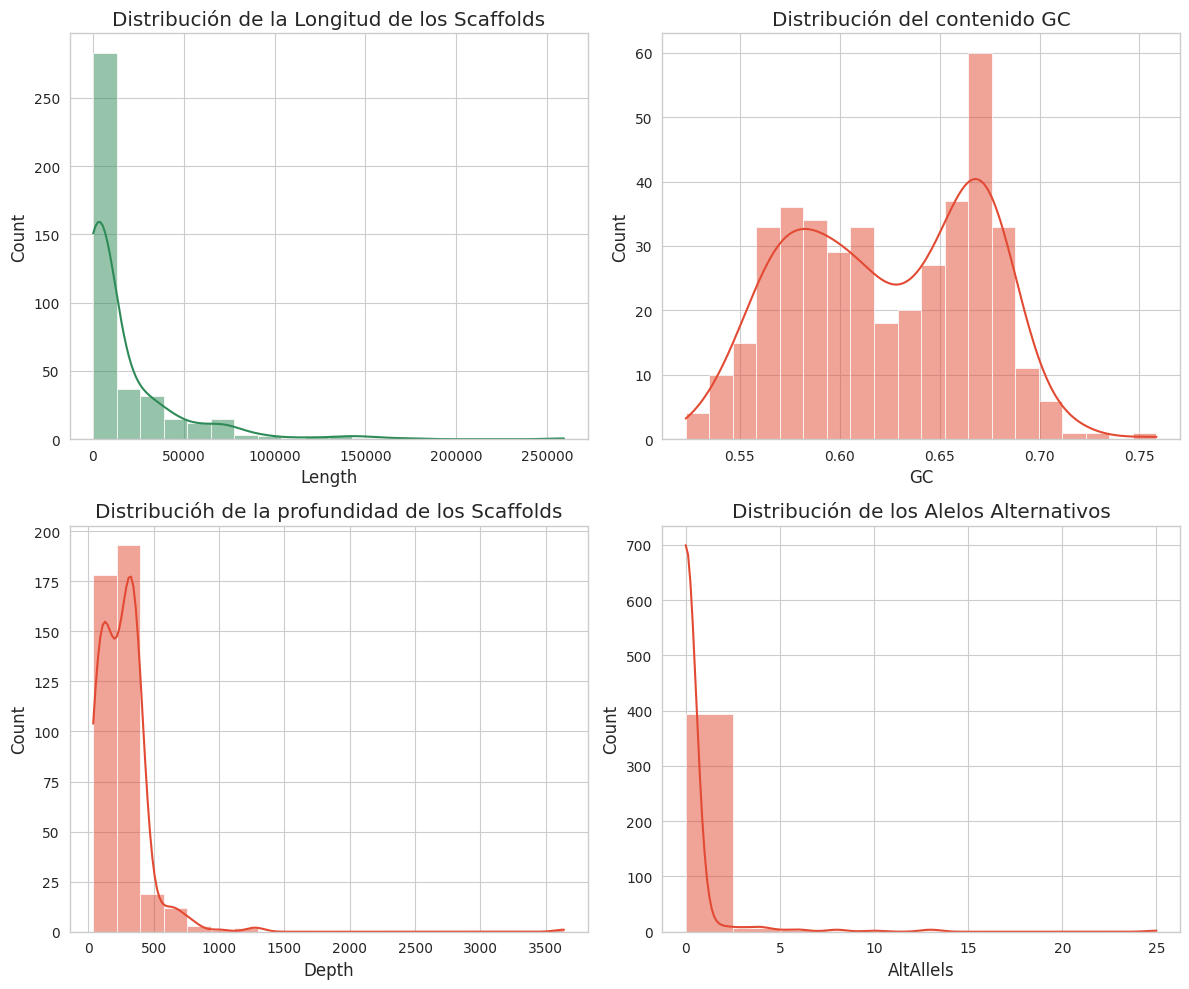

In [49]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Length"], bins=20, kde=True, color="seagreen",ax=axes[0, 0])
axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del contenido GC")

sns.histplot(df["Depth"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribucióh de la profundidad de los Scaffolds")

sns.histplot(df["AltAllels"], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de los Alelos Alternativos")

plt.tight_layout()
plt.show()

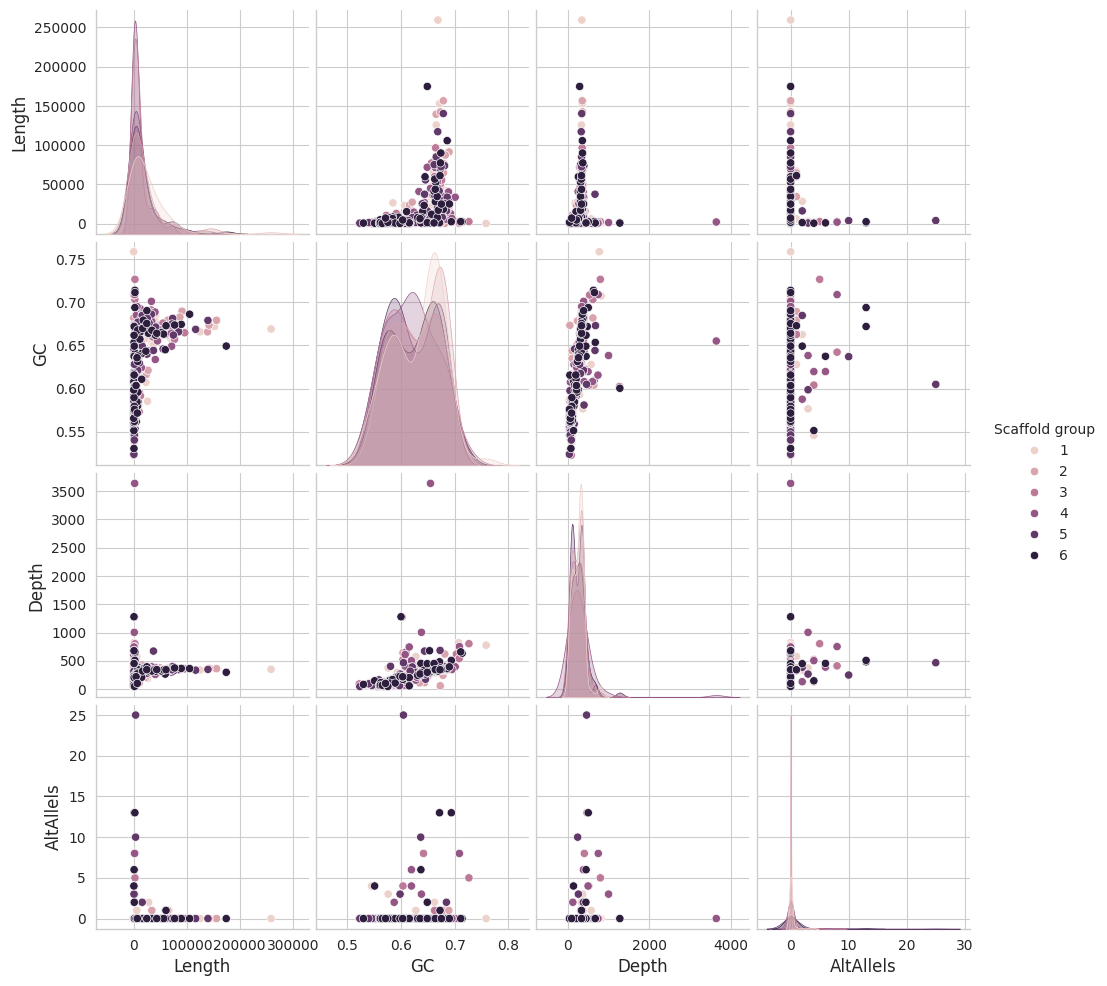

In [50]:
df['Scaffold group'] = np.repeat(range(1, 7), np.ceil(len(df) / 6))[:len(df)]
g = sns.pairplot(df, diag_kind="kde", vars=['Length','GC', 'Depth', 'AltAllels'],
                 hue='Scaffold group')
#g._legend.remove()
plt.show()

In [32]:
df_corr = df[['Length','GC', 'Depth', 'AltAllels']].dropna().corr()
df_corr

,Length,GC,Depth,AltAllels
Length,1.000000,0.469500,0.159171,-0.071928
GC,0.469500,1.000000,0.513914,0.061801
Depth,0.159171,0.513914,1.000000,0.140371
AltAllels,-0.071928,0.061801,0.140371,1.000000


<Axes: >

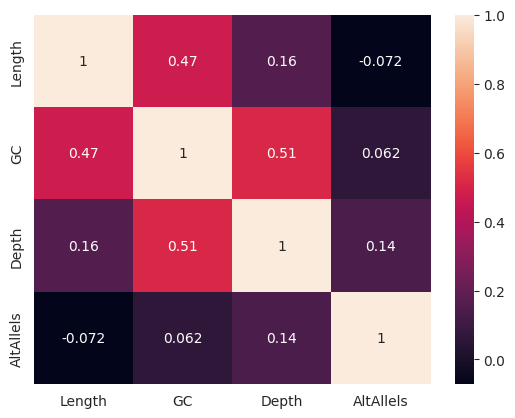

In [51]:
sns.heatmap(df_corr, annot = True)

In [34]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="Length", y="Depth", z="AltAllels",
                    size='GC', color = 'Scaffold group')
fig.show()

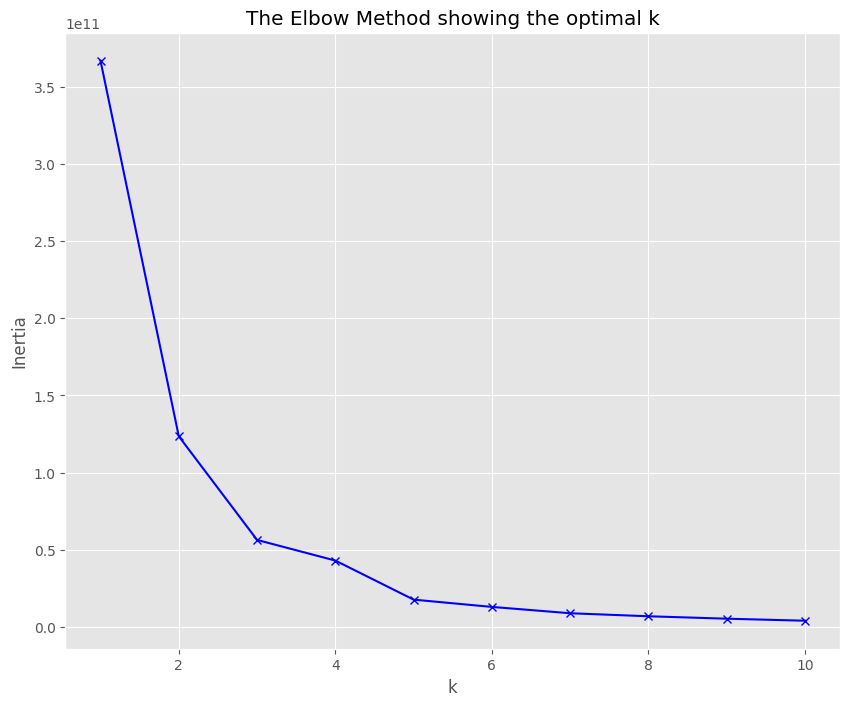

In [38]:
from sklearn.cluster import KMeans


def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df[['Length','GC', 'Depth', 'AltAllels']].dropna())
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango

  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

elbow_curve(df, maxClusters = 10)

In [39]:
model = KMeans(n_clusters=3, max_iter=1000).fit(df[['Length','GC', 'Depth', 'AltAllels']].dropna())

In [40]:
labels = model.labels_
print(labels)

[0 0 1 2 1 0 0 0 0 1 1 0 1 2 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1
 0 1]


In [41]:
df['cluster'] = labels.astype(str)
df

,Scaffold,Length,GC,Depth,AltAllels,Scaffold group,cluster
0,Contig_1_187.699,269.0,0.643123,187.6990,0,1,0
1,Contig_2_308.549,15558.0,0.653040,308.5490,0,1,0
2,Contig_3_361.647,77869.0,0.669111,361.6470,0,1,1
3,Contig_4_338.273,125675.0,0.665892,338.2730,0,1,2
4,Contig_5_381.157,67084.0,0.676391,381.1570,0,1,1
...,...,...,...,...,...,...,...
404,Contig_405_99.6129,7201.0,0.571726,99.6129,0,6,0
405,Contig_406_392.397,25174.0,0.690315,392.3970,0,6,0
406,Contig_407_343.692,43818.0,0.664088,343.6920,0,6,1
407,Contig_408_342.679,25026.0,0.675458,342.6790,0,6,0


In [43]:
fig = px.scatter_3d(df, x="Length", y="Depth", z="GC",
                    log_z= True, log_y= True,
                    size_max= 10,
                    size = [5 for i in range(df.shape[0])],
                    color="cluster")
fig.show()

In [46]:
df[['Depth', 'Length', 'GC', 'AltAllels', 'cluster']].groupby('cluster').mean()

,Depth,Length,GC,AltAllels
cluster,,,,
0,248.953387,6088.179104,0.613990,0.382090
1,348.345862,55334.876923,0.669515,0.076923
2,344.887889,156469.888889,0.669141,0.000000
